In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [312]:
df_full = pd.read_csv("cars.csv")
df_fullt

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,price_usd,is_exchangeable,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,10900.00,False,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,5000.00,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,2800.00,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,9999.00,True,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,2134.11,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,2750.00,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,4800.00,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,4300.00,False,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,4000.00,True,490


In [313]:
df_full.shape

(38531, 16)

In [314]:
df_full.info()
df_full.isnull.sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  price_usd          38531 non-null  float64
 14  is_exchangeable    38531 non-null  bool   
 15  duration_listed    38531 non-null  int64  
dtypes: bool(3), float64(2)

AttributeError: 'function' object has no attribute 'sum'

In [315]:
df_full['manufacturer_name'] = df_full.manufacturer_name.str.split().str.get(0)
df_full['manufacturer_name'] = df_full.manufacturer_name.str.split().str.get(0)
df_full.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,price_usd,is_exchangeable,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,10900.00,False,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,5000.00,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,2800.00,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,9999.00,True,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,2134.11,True,7


In [316]:
df_full['manufacturer_name'].value_counts().sum()

38531

In [317]:
#to get names of columns with missing values
cols_with_missing = [col for col in df_full.columns
                     if df_full[col].isnull().any()]
print("Columns with missing values:")
print(cols_with_missing)

Columns with missing values:
['engine_capacity']


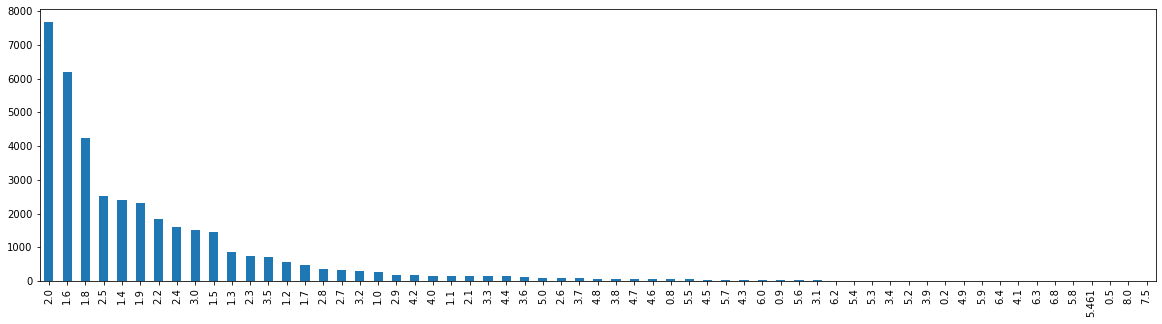

In [318]:
data = pd.concat([df_full], sort=False)
plt.figure(figsize=(20,5))
data['engine_capacity'].value_counts().head(100).plot.bar()
plt.show()

In [348]:
#replacing the missing values in engine_capacity with 2.0 from the above graph
mean=np.mean(df_full.engine_capacity)
print(mean)

2.0551611069287987


In [349]:
df_full.fillna(2.0)

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,duration_listed,manufacturer_name_Acura,manufacturer_name_Alfa,...,body_type_minibus,body_type_minivan,body_type_pickup,body_type_sedan,body_type_suv,body_type_universal,body_type_van,state_emergency,state_new,state_owned
0,190000,2010,False,2.5,False,10900.00,False,16,0,0,...,0,0,0,0,0,1,0,0,0,1
1,290000,2002,False,3.0,False,5000.00,True,83,0,0,...,0,0,0,0,0,1,0,0,0,1
2,402000,2001,False,2.5,False,2800.00,True,151,0,0,...,0,0,0,0,1,0,0,0,0,1
3,10000,1999,False,3.0,False,9999.00,True,86,0,0,...,0,0,0,1,0,0,0,0,0,1
4,280000,2001,False,2.5,False,2134.11,True,7,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,290000,2000,False,3.5,False,2750.00,True,301,0,0,...,0,0,0,1,0,0,0,0,0,1
38527,321000,2004,False,2.2,False,4800.00,True,317,0,0,...,0,0,0,0,0,0,0,0,0,1
38528,777957,2000,False,3.5,False,4300.00,False,369,0,0,...,0,0,0,1,0,0,0,0,0,1
38529,20000,2001,False,2.0,False,4000.00,True,490,0,0,...,0,1,0,0,0,0,0,0,0,1


In [350]:
import re

def get_number(name):
    title_search = re.search('([\d+\.+\d]+\W)', name)
    
    if title_search:
        return title_search.group(1)
    return ""

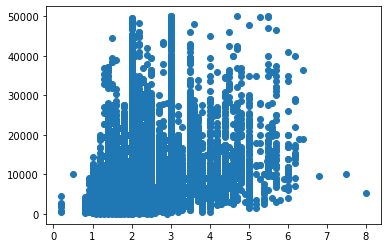

In [351]:
import seaborn as sns
plt.scatter(df_full['engine_capacity'],df_full['price_usd'])

In [352]:
plt.plot(df_full['manufacturer_name'], df_full['engine_capacity'], label = 'engine_capacity')
plt.plot(df_full['engine_capacity'], df_full['price_usd'], label = 'price_usd')
plt.xlabel('manufacturer_name')
plt.ylabel('Popularity')
plt.title('Popularity of these features by manufacturer_name')
plt.grid(True)
plt.legend()
df_full.info()

KeyError: 'manufacturer_name'

In [ ]:
import matplotlib.pylab as plt
import seaborn as sns
# calculate correlation matrix
corr = df_full.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

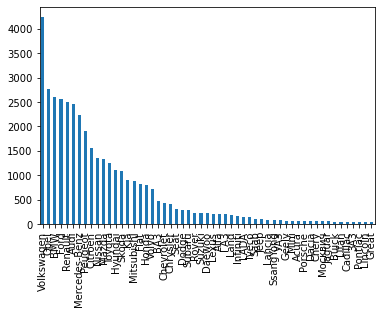

In [324]:
df_full['manufacturer_name'].value_counts().plot(kind='bar')

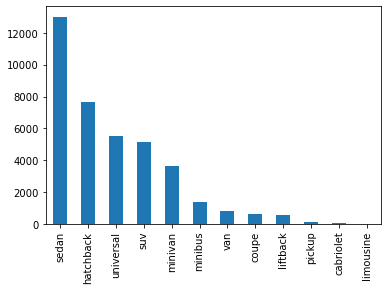

In [325]:
#the body of the car which has more
df_full['body_type'].value_counts().plot(kind='bar')

In [326]:
df_full = pd.get_dummies(df_full)
print(df_full.columns)

In [340]:
# One-hot encode the data using pandas get_dummies
df_full = pd.get_dummies(df_full)
# Display the first 5 rows of the last 12 columns
df_full.iloc[:,5:].head(5)

,price_usd,is_exchangeable,duration_listed,manufacturer_name_Acura,manufacturer_name_Alfa,manufacturer_name_Audi,manufacturer_name_BMW,manufacturer_name_Buick,manufacturer_name_Cadillac,manufacturer_name_Chery,...,body_type_minibus,body_type_minivan,body_type_pickup,body_type_sedan,body_type_suv,body_type_universal,body_type_van,state_emergency,state_new,state_owned
0,10900.00,False,16,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,5000.00,True,83,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2800.00,True,151,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,9999.00,True,86,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2134.11,True,7,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [345]:
from sklearn.model_selection import train_test_split  #creates 4 splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [346]:
#scaling the data
from sklearn.preprocessing import StandardScaler
X_head = df_full.iloc[:, df_full.columns != 'price_usd']
X = df_full.loc[:, df_full.columns != 'price_usd']
y = df_full['price_usd']
X = StandardScaler().fit_transform(X)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
#MAE stands for Mean Absolute Error, thus if yours is 1069 it means, that if you randomly choose a data point from your data, then, you would expect your prediction to be 1069 away from the true value, Mean price is 6639 usd 
print('Mean Absolute Error',mae(y_test, pred))
print('Mean Squared Error',df_full['price_usd'].mean())

In [ ]:
#the three important features 
feat_importances = pd.Series(model.feature_importances_, index=X_head.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [ ]:
fig, axes = plt.subplots(2,2)
axes[0,0].hist(df_full['price_usd'])
axes[0,1].plot(df_full['manufacturer_name'],df_full['price_usd'])
axes[1,0].plot(df_full['manufacturer_name'],df_full['engine_capacity'])
axes[1,1].plot(df_full['manufacturer_name'],df_full['body_type'])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_full['transmission'], df_full['price_usd'])
ax.set_xlabel('Transmission in Automatic/Mechanical')
ax.set_ylabel('Price')
plt.show()

In [ ]:
#exploratory analysis
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(manufacturer_name, price_usd)
axs[1].scatter(manufacturer_name, price_usd)
axs[2].plot(manufacturer_name, price_usd)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_full[:,0], df_full[:,1], c=labels, cmap = 'viridis')

plt.show()

In [ ]:
plt.figure(figsize=(50,10))
plt.hist(df_full['manufacturer_name'], bins=40)

In [ ]:
t = price_usd
s =manufacturer_name

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='price_usd', ylabel='manufacturer_name',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)